<a href="https://colab.research.google.com/github/majoralex/Google-Sheets-Automation/blob/master/PyTrends_Search_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
from pytrends.request import TrendReq
import pandas as pd
pd.set_option('display.max_columns', 100)
import time

from google.colab import auth
auth.authenticate_user()
import numpy as np

import gspread
from oauth2client.client import GoogleCredentials

from gspread_dataframe import set_with_dataframe

In [294]:
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)


In [295]:

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('1JQqYT0YOdJ9vSHr4MY-161rks6qTicFlVb89WJdKTSQ')
ws = wb.worksheet('Parameters')
ws2 = wb.worksheet('Data')

rows = ws.get_all_values()

dfLocation = pd.DataFrame.from_records(rows)

start_date = dfLocation.loc[1,2]
end_date = dfLocation.loc[1,3]

timeperiod = start_date + ' ' + end_date


df = dfLocation.loc[1:,0]
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df = list(df)


In [296]:
dataset = []

for x in range(0,len(df)):
    keywords = [df[x]]
    pytrend.build_payload(
    kw_list=keywords,
    #Select Category
    #https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
    cat=41,
    timeframe=timeperiod,
    geo='CA')
    data = pytrend.interest_over_time()
    if not data.empty:
        data = data.drop(labels=['isPartial'],axis='columns')
        dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('search_trends.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 3.7189903259277344


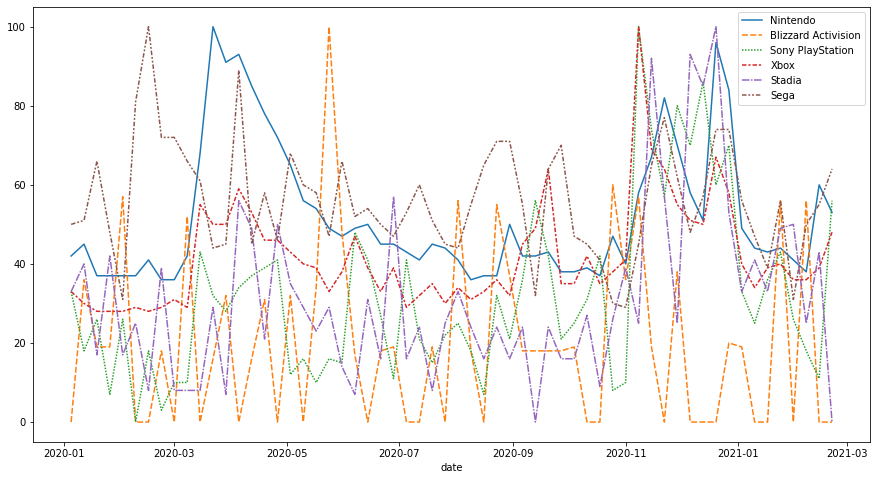

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(data=result)

In [298]:
# CLEAR SHEET CONTENT
#https://stackoverflow.com/questions/62917910/python-export-pandas-dataframe-to-google-sheets-solved
range_of_cells = ws2.range('A2:X1000') #-> Select the range you want to clear
for cell in range_of_cells:
    cell.value = ''
ws2.update_cells(range_of_cells) 
result.reset_index(level=0, inplace=True)
set_with_dataframe(ws2, result) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

# New section

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.